## Load necessary modules

In [3]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load RetinaNet model

In [8]:


# load retinanet model
print(os.getcwd())
model = models.load_model('../../snapshots/resnet50_csv_50.h5', backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'cat', 1: 'dog'}

/home/developer/Documents/CMU/Capstone_Codes/cervical-cancer-project/keras_retinanet/examples


2023-11-16 11:42:44.007731: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 11:42:44.043070: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 11:42:44.043283: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Run detection on example

processing time:  0.384249210357666
2.4024024024024024
0.006515347
[0 0 0 0]
0.0077354363
[0 0 0 0]


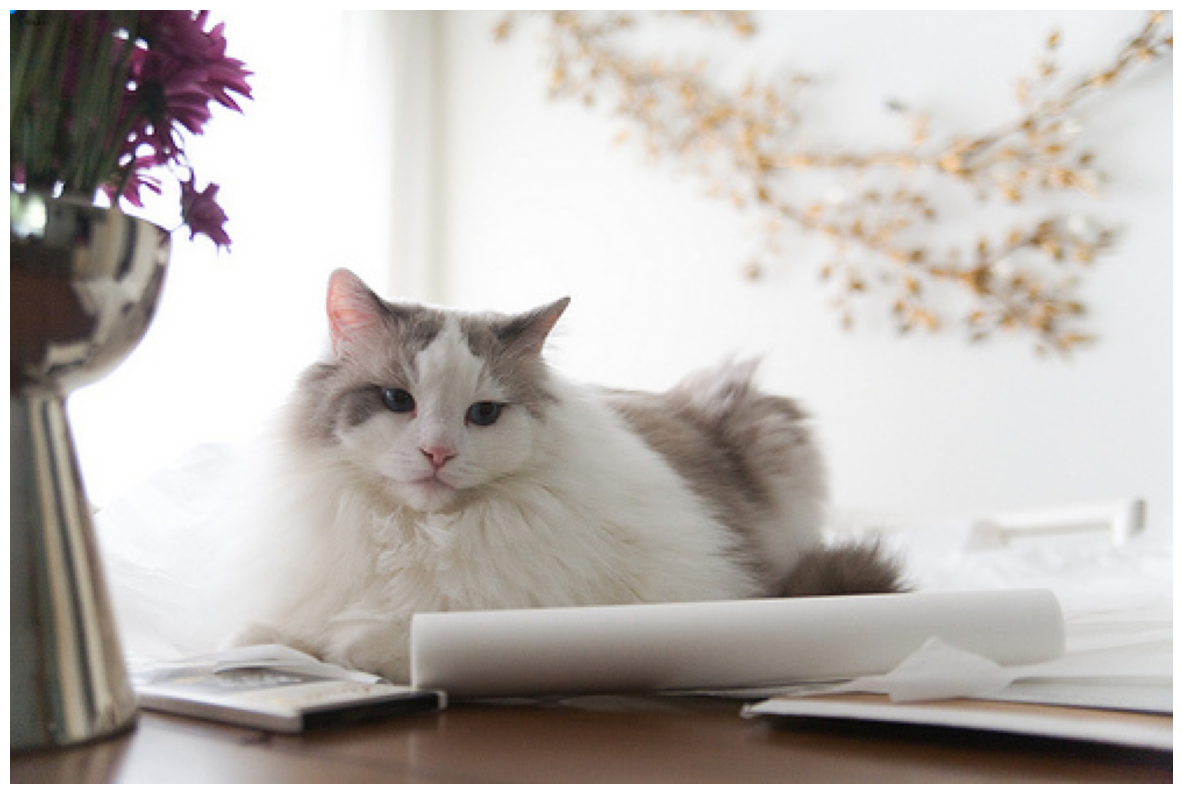

In [24]:
# load image
image = read_image_bgr('Cats_Test197.png')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
x = model.predict_on_batch(np.expand_dims(image, axis=0))
boxes, scores = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

print(scale)
# correct for image scale
# boxes /= scale
i = 0
# visualize detections
for box, score in zip(boxes[0], scores[0][0]):
    # scores are sorted so we can break
    print(score)
    

        
    color = label_color(i)
    # box = box*255
    b = box.astype(int)
    print(b)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format("Test", score)
    draw_caption(draw, b, caption)
    i = i+1
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()